# Data Preprocessing - Titanic

## Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.shape

(891, 15)

## Drop Duplicated Rows if any

In [9]:
duplicated_rows = data.duplicated()
duplicated_rows.sum()

107

In [11]:
data = data[~duplicated_rows]

In [13]:
data.shape

(784, 15)

## Missing Values

In [16]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

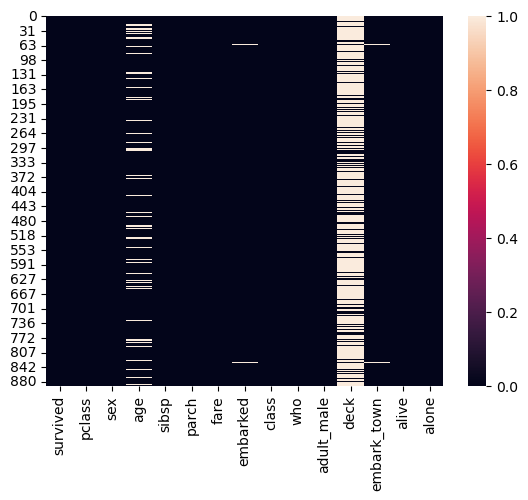

In [18]:
sns.heatmap(data.isna())

In [20]:
data.isna().sum()/data.shape[0]*100 #null values in percentage

survived        0.000000
pclass          0.000000
sex             0.000000
age            13.520408
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.255102
class           0.000000
who             0.000000
adult_male      0.000000
deck           74.234694
embark_town     0.255102
alive           0.000000
alone           0.000000
dtype: float64

In [22]:
data.dropna() #by default inplace is False

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [24]:
data.shape

(784, 15)

## Splitting data into categorical and numerical

In [27]:
num_df = data.select_dtypes(include="number")
cat_df = data.select_dtypes(include="object_")

In [29]:
num_col = num_df.columns.tolist()
cat_col = cat_df.columns.tolist()

print("Numerical columns are \n{} \nCategorical columns are \n{}".format(num_col,cat_col))

Numerical columns are 
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'] 
Categorical columns are 
['sex', 'embarked', 'who', 'embark_town', 'alive']


## Histogram for numerical columns

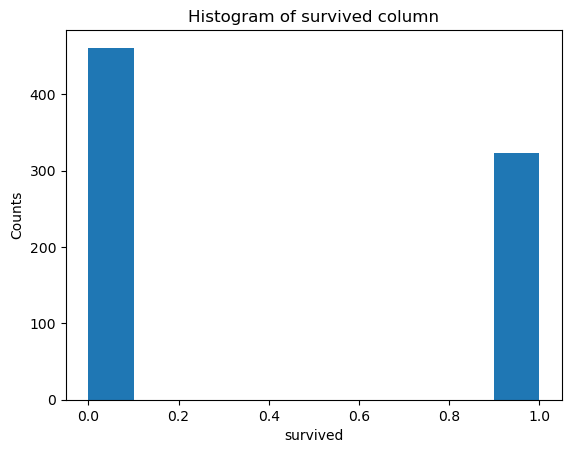

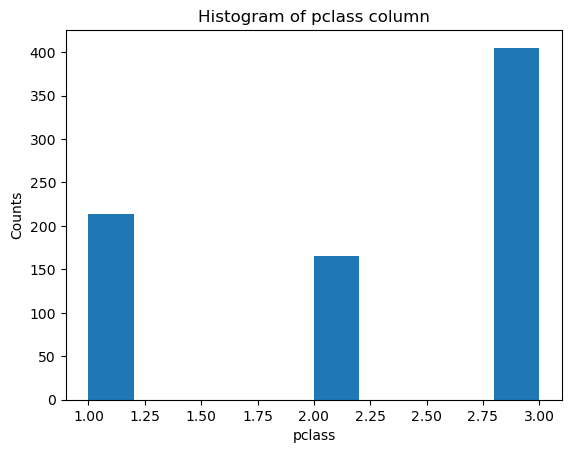

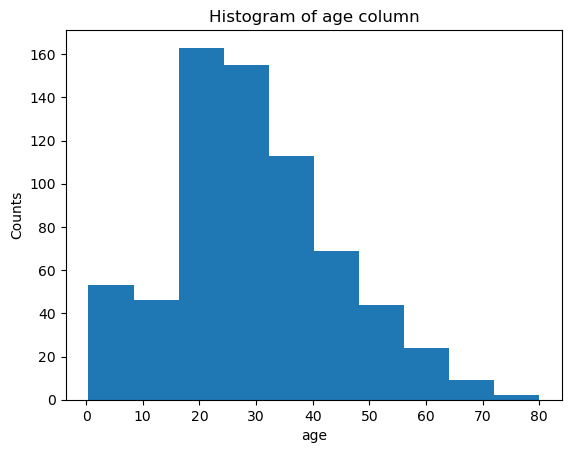

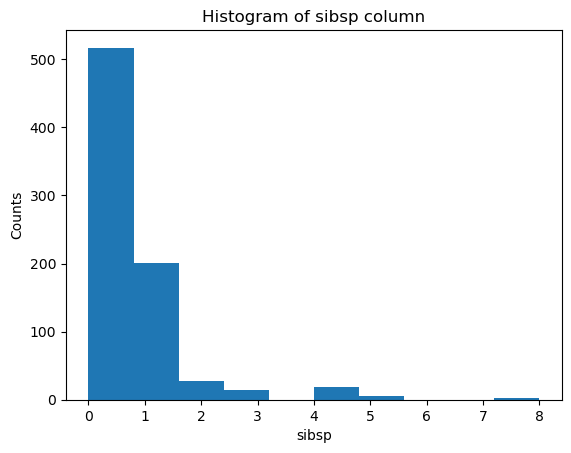

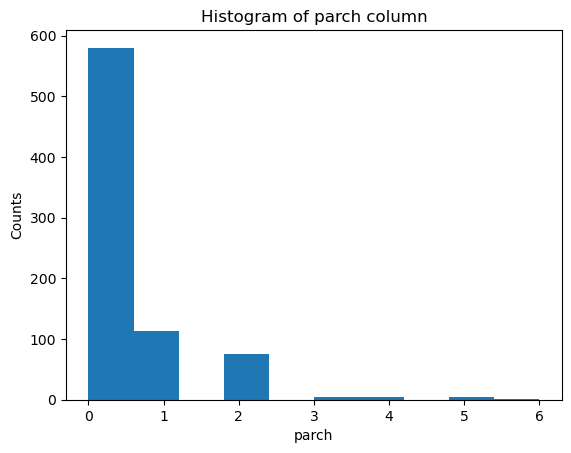

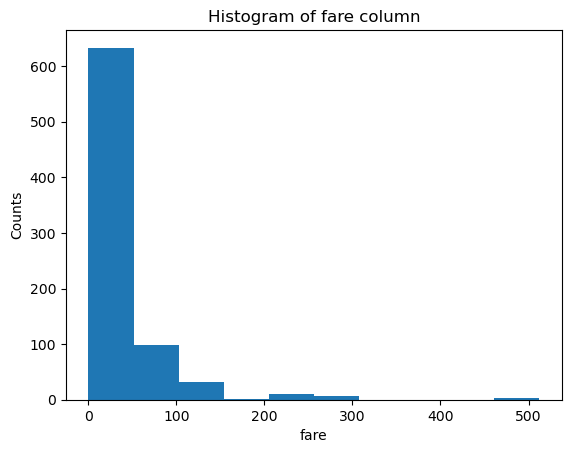

In [32]:
for col in num_col:
    plt.hist(num_df[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("Counts")
    plt.show()

## Filling missing values for numerical columns

In [35]:
for col in num_col:
    num_df[col] = num_df[col].fillna(num_df[col].median())

In [37]:
num_df.isna().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

## Filling missing values for categorical columns

In [40]:
for col in cat_col:
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

In [42]:
cat_df.isna().sum()

sex            0
embarked       0
who            0
embark_town    0
alive          0
dtype: int64

## Recombining both Categorical and Numerical Column

In [45]:
data = pd.concat([num_df,cat_df],axis=1)

In [47]:
data.isna().sum()

survived       0
pclass         0
age            0
sibsp          0
parch          0
fare           0
sex            0
embarked       0
who            0
embark_town    0
alive          0
dtype: int64

## Drop Duplicated Col if any

In [50]:
dup_col = data.columns.duplicated()
dup_col.sum()

0

In [52]:
data = data.loc[:,~dup_col]

<Axes: >

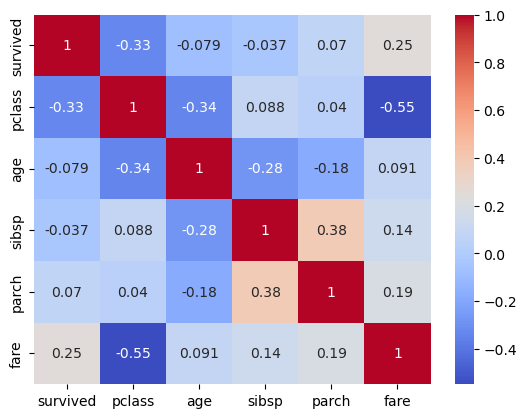

In [54]:
sns.heatmap(num_df.corr(),annot=True,cmap='coolwarm')

## Outlier Handling

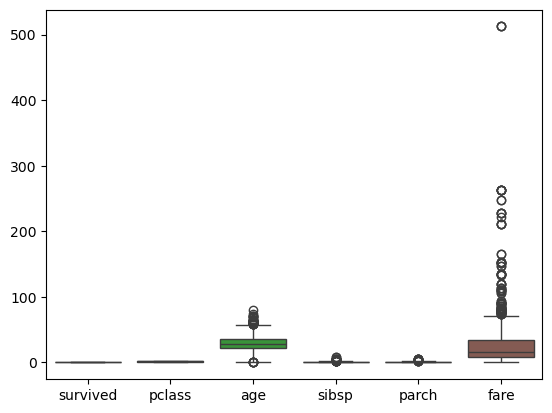

In [57]:
sns.boxplot(num_df)
plt.show()

In [59]:
def remove_outlier(df,col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3+1.5*iqr
    lower_bound = q1-1.5*iqr
    df[col_name] = df[col_name].clip(upper = upper_bound)
    df[col_name] = df[col_name].clip(lower = lower_bound)
    return df[col_name]

In [61]:
for col in num_df:
    num_df[col]=remove_outlier(num_df,col)

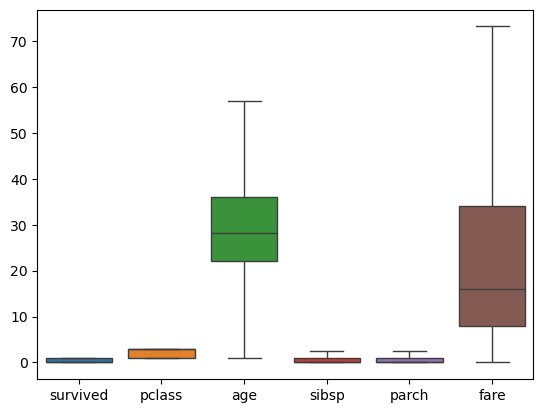

In [63]:
sns.boxplot(num_df)
plt.xticks(ha='center')
plt.show()

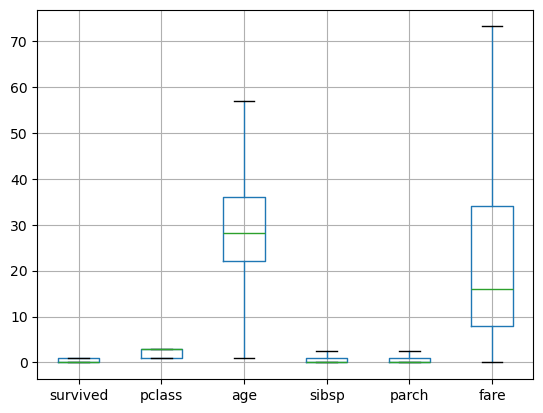

In [65]:
num_df.boxplot()
plt.show()

## Imbalance Class Plot

In [68]:
data['embark_town'].value_counts()

embark_town
Southampton    570
Cherbourg      155
Queenstown      59
Name: count, dtype: int64

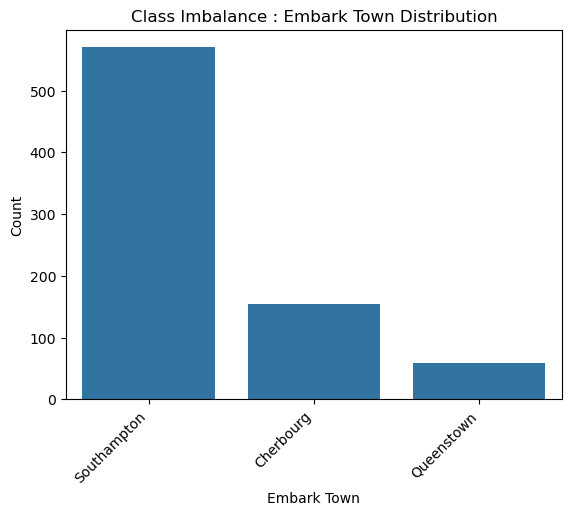

In [70]:
sns.countplot(x='embark_town',data=data)
plt.title('Class Imbalance : Embark Town Distribution')
plt.xlabel('Embark Town')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()

In [72]:
data.drop('who',axis=1,inplace=True)
data

,survived,pclass,age,sibsp,parch,fare,sex,embarked,embark_town,alive
0,0,3,22.00,1,0,7.2500,male,S,Southampton,no
1,1,1,38.00,1,0,71.2833,female,C,Cherbourg,yes
2,1,3,26.00,0,0,7.9250,female,S,Southampton,yes
3,1,1,35.00,1,0,53.1000,female,S,Southampton,yes
4,0,3,35.00,0,0,8.0500,male,S,Southampton,no
...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.00,0,5,29.1250,female,Q,Queenstown,no
887,1,1,19.00,0,0,30.0000,female,S,Southampton,yes
888,0,3,28.25,1,2,23.4500,female,S,Southampton,no
889,1,1,26.00,0,0,30.0000,male,C,Cherbourg,yes


## Resampling

In [93]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [95]:
#OverSampling

x=data.drop('embark_town',axis=1) #seperate features and labels
y=data['embark_town']

oversampler=RandomOverSampler(random_state=42)
x_resampled, y_resampled=oversampler.fit_resample(x,y)


embark_town
Southampton    570
Cherbourg      570
Queenstown     570
Name: count, dtype: int64


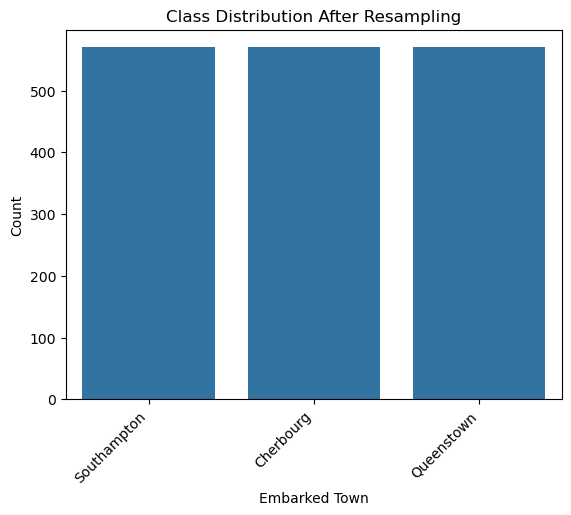

In [97]:
# Create a new balanced DataFrame
bal_data=pd.DataFrame(x_resampled,columns=x.columns)
bal_data['embark_town']=y_resampled
#check class distributiion after resampling
print(bal_data['embark_town'].value_counts())

sns.countplot(x='embark_town',data=bal_data)
plt.title("Class Distribution After Resampling")
plt.xlabel('Embarked Town')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [99]:
#Under Sampling
x=data.drop('embark_town',axis=1) #seperate features and labels
y=data['embark_town']

undersampler=RandomUnderSampler(random_state=42)
x_resampled,y_resampled = undersampler.fit_resample(x,y)

embark_town
Cherbourg      59
Queenstown     59
Southampton    59
Name: count, dtype: int64


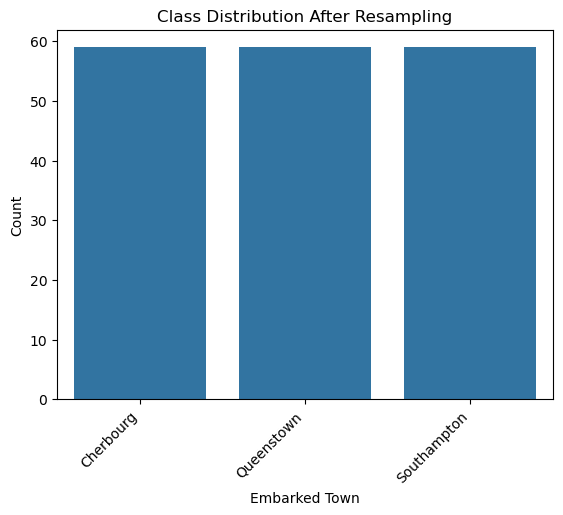

In [101]:
# Create a new balanced DataFrame
bal_data=pd.DataFrame(x_resampled,columns=x.columns)
bal_data['embark_town']=y_resampled
#check class distributiion after resampling
print(bal_data['embark_town'].value_counts())

sns.countplot(x='embark_town',data=bal_data)
plt.title("Class Distribution After Resampling")
plt.xlabel('Embarked Town')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Train Test Split

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
x_train

,survived,pclass,age,sibsp,parch,fare,sex,embarked,alive
371,0,3,18.0,1,0,6.4958,male,S,no
165,1,3,9.0,0,2,20.5250,male,S,yes
779,1,1,43.0,0,1,211.3375,female,S,yes
339,0,1,45.0,0,0,35.5000,male,S,no
607,1,1,27.0,0,0,30.5000,male,S,yes
...,...,...,...,...,...,...,...,...,...
599,1,1,49.0,1,0,56.9292,male,C,yes
661,0,3,40.0,0,0,7.2250,male,C,no
550,1,1,17.0,0,2,110.8833,male,C,yes
591,1,1,52.0,1,0,78.2667,female,C,yes


# Encoding

In [659]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [660]:
df=pd.DataFrame(data)
df.head()

,survived,pclass,age,sibsp,parch,fare,sex,embarked,who,embark_town,alive
0,0,3,22.0,1,0,7.2500,male,S,man,Southampton,no
1,1,1,38.0,1,0,71.2833,female,C,woman,Cherbourg,yes
2,1,3,26.0,0,0,7.9250,female,S,woman,Southampton,yes
3,1,1,35.0,1,0,53.1000,female,S,woman,Southampton,yes
4,0,3,35.0,0,0,8.0500,male,S,man,Southampton,no


## Label Encoding


In [670]:
label_enc = LabelEncoder()
df['town_encoded'] = label_enc.fit_transform(df['embark_town'])
data

,survived,pclass,age,sibsp,parch,fare,sex,embarked,who,embark_town,alive
0,0,3,22.00,1,0,7.2500,male,S,man,Southampton,no
1,1,1,38.00,1,0,71.2833,female,C,woman,Cherbourg,yes
2,1,3,26.00,0,0,7.9250,female,S,woman,Southampton,yes
3,1,1,35.00,1,0,53.1000,female,S,woman,Southampton,yes
4,0,3,35.00,0,0,8.0500,male,S,man,Southampton,no
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.00,0,5,29.1250,female,Q,woman,Queenstown,no
887,1,1,19.00,0,0,30.0000,female,S,woman,Southampton,yes
888,0,3,28.25,1,2,23.4500,female,S,woman,Southampton,no
889,1,1,26.00,0,0,30.0000,male,C,man,Cherbourg,yes


## Ordinal Encoding

In [673]:
alive_ordered = ['yes','no']
ordinal_enc = OrdinalEncoder(categories=[alive_ordered])
df['alive_enc'] = ordinal_enc.fit_transform(df[['alive']])
df

,survived,pclass,age,sibsp,parch,fare,sex,embarked,who,embark_town,alive,town_encoded,alive_enc
0,0,3,22.00,1,0,7.2500,male,S,man,Southampton,no,2,1.0
1,1,1,38.00,1,0,71.2833,female,C,woman,Cherbourg,yes,0,0.0
2,1,3,26.00,0,0,7.9250,female,S,woman,Southampton,yes,2,0.0
3,1,1,35.00,1,0,53.1000,female,S,woman,Southampton,yes,2,0.0
4,0,3,35.00,0,0,8.0500,male,S,man,Southampton,no,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.00,0,5,29.1250,female,Q,woman,Queenstown,no,1,1.0
887,1,1,19.00,0,0,30.0000,female,S,woman,Southampton,yes,2,0.0
888,0,3,28.25,1,2,23.4500,female,S,woman,Southampton,no,2,1.0
889,1,1,26.00,0,0,30.0000,male,C,man,Cherbourg,yes,0,0.0


## One Hot Encoding


### Using Pandas

In [677]:
onehot_enc = pd.get_dummies(df.embarked,dtype=int)
onehot_enc

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
885,0,1,0
887,0,0,1
888,0,0,1
889,1,0,0


### Using Sklearn

In [680]:
one_hot_enc = OneHotEncoder(sparse_output=False)
embark_enc = one_hot_enc.fit_transform(df[['embarked']])

df_new=pd.DataFrame(embark_enc,columns=one_hot_enc.get_feature_names_out(['embarked']))
df_new

,embarked_C,embarked_Q,embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
779,0.0,1.0,0.0
780,0.0,0.0,1.0
781,0.0,0.0,1.0
782,1.0,0.0,0.0


## Feature Scaling

In [600]:
num_df

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.00,1.0,0.0,7.2500
1,1,1,38.00,1.0,0.0,71.2833
2,1,3,26.00,0.0,0.0,7.9250
3,1,1,35.00,1.0,0.0,53.1000
4,0,3,35.00,0.0,0.0,8.0500
...,...,...,...,...,...,...
885,0,3,39.00,0.0,2.5,29.1250
887,1,1,19.00,0.0,0.0,30.0000
888,0,3,28.25,1.0,2.0,23.4500
889,1,1,26.00,0.0,0.0,30.0000


In [602]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

## Standard Scaling


In [685]:
std_scale = StandardScaler()
num_df["age_std_scale"] = std_scale.fit_transform(num_df[["age"]])

In [687]:
num_df.head()

,survived,pclass,age,sibsp,parch,fare,age_std_scale
0,0,3,22.0,1.0,0.0,7.2500,-0.565647
1,1,1,38.0,1.0,0.0,71.2833,0.661944
2,1,3,26.0,0.0,0.0,7.9250,-0.258749
3,1,1,35.0,1.0,0.0,53.1000,0.431770
4,0,3,35.0,0.0,0.0,8.0500,0.431770


## Minmax Scaling

In [690]:
min_max = MinMaxScaler()
num_df['age_min_max'] = min_max.fit_transform(num_df[['age']])

In [692]:
num_df

,survived,pclass,age,sibsp,parch,fare,age_std_scale,age_min_max
0,0,3,22.00,1.0,0.0,7.2500,-0.565647,0.375000
1,1,1,38.00,1.0,0.0,71.2833,0.661944,0.660714
2,1,3,26.00,0.0,0.0,7.9250,-0.258749,0.446429
3,1,1,35.00,1.0,0.0,53.1000,0.431770,0.607143
4,0,3,35.00,0.0,0.0,8.0500,0.431770,0.607143
...,...,...,...,...,...,...,...,...
885,0,3,39.00,0.0,2.5,29.1250,0.738668,0.678571
887,1,1,19.00,0.0,0.0,30.0000,-0.795820,0.321429
888,0,3,28.25,1.0,2.0,23.4500,-0.086119,0.486607
889,1,1,26.00,0.0,0.0,30.0000,-0.258749,0.446429


## Scaling and Correlation Matrix

In [720]:
std = num_df[num_col]
minmax = num_df[num_col]

In [724]:
std_scale = StandardScaler()
std_data = std_scale.fit_transform(std)
std.loc[:,num_col] = std_data
std

,survived,pclass,age,sibsp,parch,fare
0,-0.837049,0.885158,-0.565647,0.776125,-0.543995,-0.845924
1,1.194673,-1.455362,0.661944,0.776125,-0.543995,1.969018
2,1.194673,0.885158,-0.258749,-0.634030,-0.543995,-0.816251
3,1.194673,-1.455362,0.431770,0.776125,-0.543995,1.169669
4,-0.837049,0.885158,0.431770,-0.634030,-0.543995,-0.810756
...,...,...,...,...,...,...
885,-0.837049,0.885158,0.738668,-0.634030,2.992426,0.115714
887,1.194673,-1.455362,-0.795820,-0.634030,-0.543995,0.154179
888,-0.837049,0.885158,-0.086119,0.776125,2.285142,-0.133763
889,1.194673,-1.455362,-0.258749,-0.634030,-0.543995,0.154179


In [728]:
min_max = MinMaxScaler()
minmax_data = min_max.fit_transform(minmax)
minmax = pd.DataFrame(minmax_data,columns=[num_col])
minmax

,survived,pclass,age,sibsp,parch,fare
0,0.0,1.0,0.375000,0.4,0.0,0.099046
1,1.0,0.0,0.660714,0.4,0.0,0.973837
2,1.0,1.0,0.446429,0.0,0.0,0.108267
3,1.0,0.0,0.607143,0.4,0.0,0.725426
4,0.0,1.0,0.607143,0.0,0.0,0.109975
...,...,...,...,...,...,...
779,0.0,1.0,0.678571,0.0,1.0,0.397891
780,1.0,0.0,0.321429,0.0,0.0,0.409845
781,0.0,1.0,0.486607,0.4,0.8,0.320362
782,1.0,0.0,0.446429,0.0,0.0,0.409845


In [732]:
num_df[num_col].corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.332658,-0.075963,0.011963,0.105521,0.305976
pclass,-0.332658,1.000000,-0.345136,0.038147,0.016993,-0.732807
age,-0.075963,-0.345136,1.000000,-0.267073,-0.260261,0.145250
sibsp,0.011963,0.038147,-0.267073,1.000000,0.423480,0.293320
parch,0.105521,0.016993,-0.260261,0.423480,1.000000,0.266753
fare,0.305976,-0.732807,0.145250,0.293320,0.266753,1.000000


In [734]:
std.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.332658,-0.075963,0.011963,0.105521,0.305976
pclass,-0.332658,1.000000,-0.345136,0.038147,0.016993,-0.732807
age,-0.075963,-0.345136,1.000000,-0.267073,-0.260261,0.145250
sibsp,0.011963,0.038147,-0.267073,1.000000,0.423480,0.293320
parch,0.105521,0.016993,-0.260261,0.423480,1.000000,0.266753
fare,0.305976,-0.732807,0.145250,0.293320,0.266753,1.000000


In [736]:
minmax.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.332658,-0.075963,0.011963,0.105521,0.305976
pclass,-0.332658,1.000000,-0.345136,0.038147,0.016993,-0.732807
age,-0.075963,-0.345136,1.000000,-0.267073,-0.260261,0.145250
sibsp,0.011963,0.038147,-0.267073,1.000000,0.423480,0.293320
parch,0.105521,0.016993,-0.260261,0.423480,1.000000,0.266753
fare,0.305976,-0.732807,0.145250,0.293320,0.266753,1.000000


### Heatmap of the correlation matrix

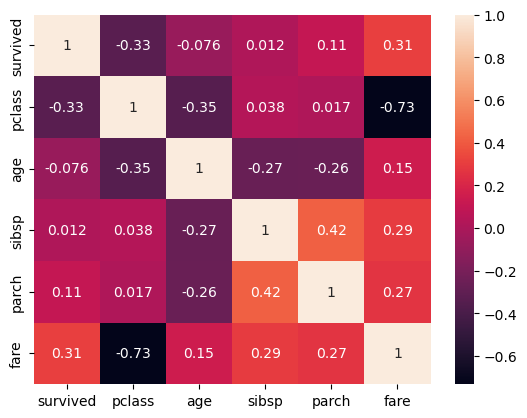

In [747]:
sns.heatmap(num_df[num_col].corr(),annot=True)
plt.show()
